# Mini Demo


In [32]:
import importlib
import utils
import mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable
import myknnclassifier

mush_data = MyPyTable()
mush_data.load_from_file('/home/CPSC322finalProject/new_mushroom_cleaned.csv')

In [33]:
# train test split and data set shrink
indexes_to_remove = utils.rand_inds(45000, 54034)
mush_data.drop_rows(indexes_to_remove)


#print(len(mush_data.data))

df_mush = []
for i, row in enumerate(mush_data.data):
    df_mush.append(row)

#print(len(df_mush))


season = [row[7] for row in df_mush]
stem_width = [row[5] for row in df_mush]
gill_color = [row[3] for row in df_mush]
cap_diameter = [row[0] for row in df_mush]

yummy_or_nah = [row[8] for row in df_mush]

# normalize the data
season_norm = utils.normalize_data(season)
stem_width_norm = utils.normalize_data(stem_width)
gill_color_norm = utils.normalize_data(gill_color)
cap_diameter_norm = utils.normalize_data(cap_diameter)

data_zipped = list(zip(season_norm, stem_width_norm, gill_color_norm, cap_diameter_norm))
X_data = data_zipped

X_train, X_test, y_train, y_test = utils.train_test_split(X_data, yummy_or_nah, test_size=0.33, random_state=1, shuffle=True)
print(len(y_test))
print(len(X_test))
print(len(X_train))
print(len(y_train))


2982
2982
6053
6053


## KNN MUSHROOMS!

In [34]:
# initiate the knn
knn = myknnclassifier.MyKNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)


x values: [1.0, 2.0, 3.0, 4.0] y values: [393, 3304, 4554, 784]


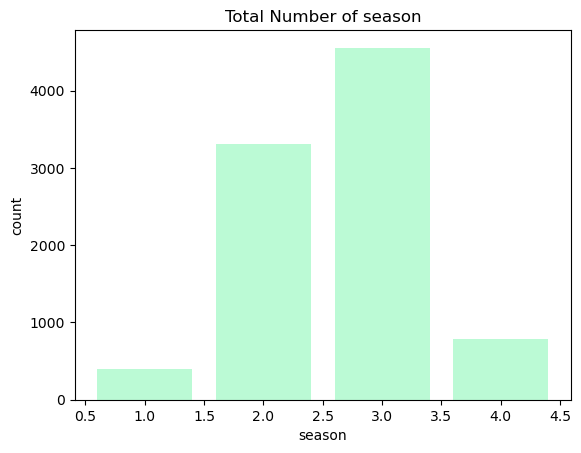

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [927, 282, 2114, 412, 300, 1073, 3927]


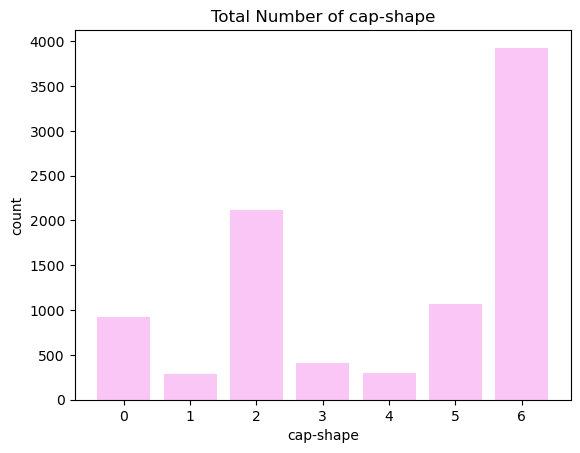

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [3250, 1624, 743, 470, 795, 899, 1254]


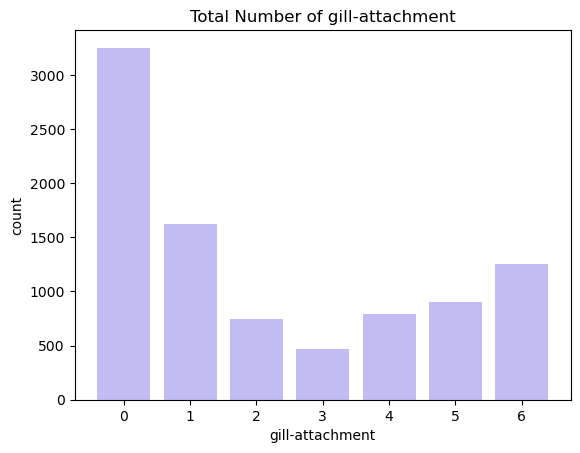

x values: [0.0, 1.0] y values: [4143, 4892]


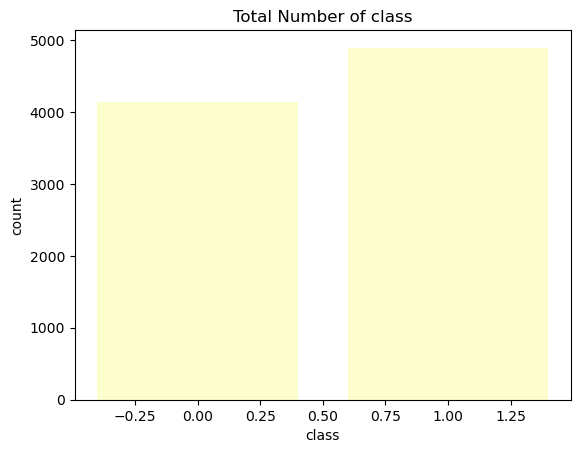

In [35]:

utils.freq_plot(mush_data.data, mush_data.column_names, "season", )
utils.freq_plot(mush_data.data, mush_data.column_names, "cap-shape")
utils.freq_plot(mush_data.data, mush_data.column_names, "gill-attachment")
utils.freq_plot(mush_data.data, mush_data.column_names, "class")


In [37]:
# Accuracy and Error Rate
results = zip(y_test, knn_y_pred)
mush_accuracy, mush_error_rate = utils.calculate_accuracy_error_rate(results)
# Display the results
print(f"Accuracy:     {mush_accuracy:.4f}")
print(f"Error Rate:   {mush_error_rate:.4f}")

TypeError: 'float' object is not iterable

In [29]:
# Precision, Recall, and F1 Measure
mush_precision, mush_recall, mush_f1 = utils.calculate_precision_recall_f1(results)
print(f"Precision:   {mush_precision:.4f}")
print(f"Recall:      {mush_recall:.4f}")
print(f"F1 Measure:  {mush_f1:.4f}")

TypeError: calculate_precision_recall_f1() takes 1 positional argument but 2 were given

In [ ]:
# Confusion Matrix
from tabulate import tabulate
mush_conf_matrix = utils.calculate_confusion_matrix(results)
print("Confusion Matrix:")
print(tabulate(mush_conf_matrix, tablefmt="simple_grid"))